# Feature Reduction with PCA (Principal Component Analysis)

## Objective
Feature Reduction, also known as dimension reduction, involves transforming data from a high-dimensional space to a low-dimensional space, ensuring the new representation retains meaningful properties of the original data. **Principal Component Analysis (PCA)**, introduced by Karl Pearson in 1901, is a widely used technique for this purpose. PCA performs an orthogonal transformation to convert a dataset of possibly correlated features into a set of linearly uncorrelated variables called principal components, with fewer components than the original features. This process is sensitive to the relative scaling of the original features. The aim of this lab is to apply PCA for feature reduction.

## Prerequisites
Complete all materials in submodule 3.6, specifically the lecture slides on PCA, to understand the underlying algorithm and its application.

## PCA Algorithm
To implement PCA, follow these steps:

1. **Centralize the features** by subtracting the mean of each feature from the dataset.
2. **Calculate the covariance matrix** of the centered features to understand how features vary together.
3. **Perform eigendecomposition** on the covariance matrix to extract eigenvalues and eigenvectors.
4. **Sort eigenvalues and eigenvectors** in descending order based on the eigenvalues, which represent the variance captured by each eigenvector.
5. **Select the top K eigenvectors** based on the sorted eigenvalues, where K is the number of principal components you wish to retain.
6. **Construct the principal components (PCs)** using the selected eigenvectors, which will be the new, lower-dimensional representation of your data.

## Instructions
- Implement the PCA algorithm using Python.
- Apply PCA to the **IRIS dataset** by selecting the first two principal components for feature reduction. The dataset is available `iris.data` or at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).
- **Plot the data** using the two principal components to visualize the reduced dimensionality.

This exercise will help you gain hands-on experience with PCA and understand how it can be applied to reduce feature dimensions while preserving the essence of the original dataset.

In [1]:
# !pip install scikit-learn 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd
import numpy as np

### 1. Load the IRIS dataset

In [2]:
#the length and the width of the sepals and petals,
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Note iris.target has the labels

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Note iris.data has the data

In [4]:
data = iris.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 2. Standardize the data, to remove bias due to differences in feature scales
Call StandardScaler().fit_transform\
How would this be computed by hand?\
Why is standarization of the data important?

In [5]:
std_data = StandardScaler().fit_transform(data)
std_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

Trasnpose to capture all the values for each feature into one row

In [6]:
features = std_data.T
features

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

### 3. Calcuate the covariance matrix
Use the numpy .cov funciton\
What does this matrix tell us?

In [7]:
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### 3. Generate eigen values and vectors
Use the np.linalg.eig function to extract the eigen values vecotrs of the covariance matrix.\
This step could have been done with SVD as well\
Repeat lab using SVD instead for this step

In [8]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

Display the eigen vectors

In [9]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

Display the eigen values\
What do the eigen values tell us?

In [10]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

### 4. Estimate the importance of each feature
Which eigen vectors do we keep and why?

In [11]:
_sum = sum(eig_vals)
for _v in eig_vals:
     print(_v / _sum)

0.7296244541329983
0.22850761786701818
0.03668921889282866
0.005178709107154747


### 5. Project the data onto the first basis (i.e., the 'axis' of the most improtant eigen vector)
That is take the dot product of the orignal data, with the most important eigen vector

In [12]:
projected_X = std_data.dot(eig_vecs.T[0])
projected_X

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

Parse into pandas dataframe\
The y-axis is set to 0 so can use 2D graph to display one dimentional data

In [13]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = iris.target
result

,PC1,y-axis,label
0,-2.264703,0.0,0
1,-2.080961,0.0,0
2,-2.364229,0.0,0
3,-2.299384,0.0,0
4,-2.389842,0.0,0
...,...,...,...
145,1.870503,0.0,2
146,1.564580,0.0,2
147,1.521170,0.0,2
148,1.372788,0.0,2


Visualzie with scatter plot\
What do you observe?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PC1 result')

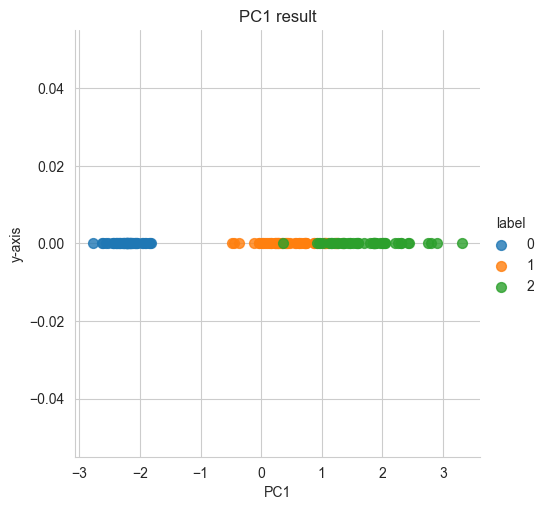

In [15]:
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PC1 result')

### 6. Repeat with 2nd most important principal component

Project onto the second basis

In [16]:
projected_Y = std_data.dot(eig_vecs.T[1])
projected_Y

array([-0.4800266 ,  0.67413356,  0.34190802,  0.59739451, -0.64683538,
       -1.48917752, -0.0476442 , -0.22314807,  1.11532768,  0.46901356,
       -1.04369065, -0.13307834,  0.72867617,  0.96150673, -1.86005711,
       -2.68628449, -1.48360936, -0.48883832, -1.40501879, -1.12784938,
       -0.40885571, -0.92412143, -0.45834367, -0.08555853, -0.13725446,
        0.62561859, -0.24216355, -0.52714953, -0.31321781,  0.3377319 ,
        0.50454069, -0.42369507, -1.79357586, -2.15072788,  0.46020184,
        0.2061074 , -0.66155811, -0.59229277,  0.90418004, -0.26887896,
       -0.44171539,  2.33741516,  0.47910069, -0.47232667, -1.14222926,
        0.71105273, -1.1204297 ,  0.38624687, -0.99795976, -0.00921636,
       -0.86297242, -0.59461473, -0.61629765,  1.75440399,  0.20842105,
        0.59328364, -0.77301931,  1.85242909, -0.03222608,  1.03401828,
        2.65407282,  0.06329519,  1.76472438,  0.18622461,  0.43900321,
       -0.50906396,  0.19631173,  0.79209574,  1.6222438 ,  1.30

Parse into a pandas dataframe

In [17]:
result2 = pd.DataFrame({'PC1':projected_X, 'PC2':projected_Y, 'label' : iris.target})
result2

,PC1,PC2,label
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


Plot the 2D graph

Text(0.5, 1.0, 'PC1 and PC2 result')

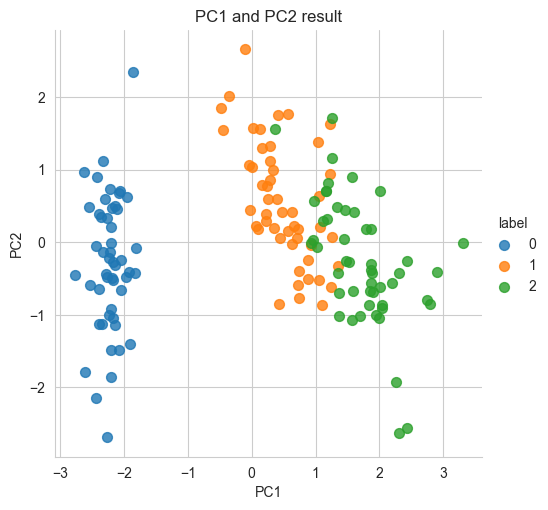

In [26]:
sns.lmplot(x='PC1', y='PC2', data=result2, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PC1 and PC2 result')

How does these plots compare to projecting onto PC3 or some 'axis' that captures less variance?\
Project the data onto the third basis

In [27]:
projected_PC3 = std_data.dot(eig_vecs.T[2])
result3 = pd.DataFrame(projected_PC3, columns=['PC3'])
result3['y-axis'] = 0.0
result3['label'] = iris.target
result3

,PC3,y-axis,label
0,-0.127706,0.0,0
1,-0.234609,0.0,0
2,0.044201,0.0,0
3,0.091290,0.0,0
4,0.015738,0.0,0
...,...,...,...
145,0.256274,0.0,2
146,-0.026371,0.0,2
147,0.180178,0.0,2
148,0.933395,0.0,2


Generate plot with the third basis only

Text(0.5, 1.0, 'PC3 result')

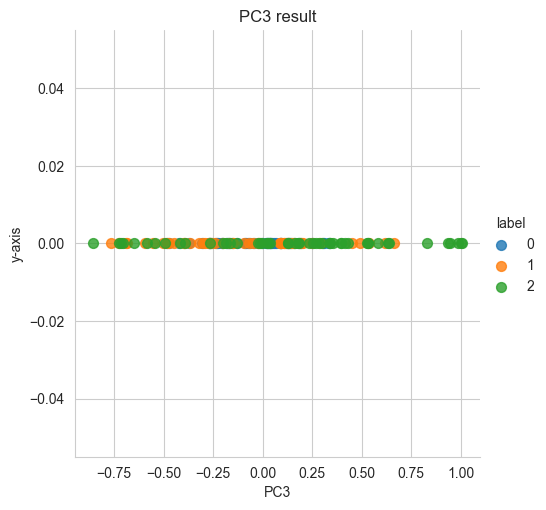

In [28]:
sns.lmplot(x='PC3', y='y-axis', data=result3, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PC3 result')

### 7. Can also use the PCA from sklearn

In [21]:
from sklearn.decomposition import PCA

Call PCA with the number of components

In [22]:
_reduced = PCA(n_components=2).fit_transform(iris.data)

In [23]:
_reduced

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

Parse into pandas dataframe

In [24]:
result4 = pd.DataFrame({'PC1':_reduced[:, 0], 'PC2':_reduced[:, 1], 'label' : iris.target})
result4

,PC1,PC2,label
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


Display plot

Text(0.5, 1.0, 'Simpler PCA result')

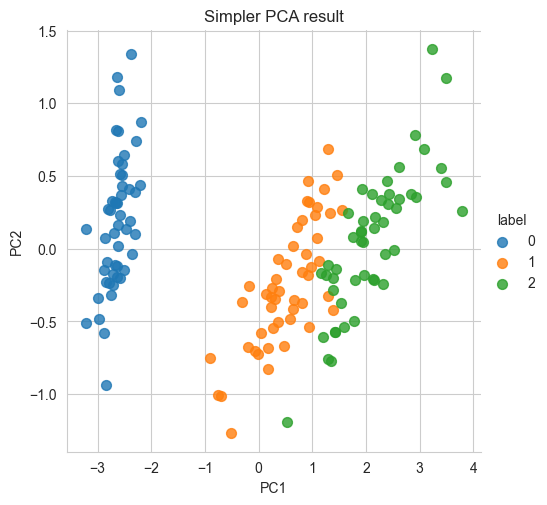

In [25]:
sns.lmplot(x='PC1', y='PC2', data=result4, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('Simpler PCA result')